In [11]:
#Program to generate 100 samples of different sizes of distribution functions
from __future__ import print_function
__author__= 'Praveen Ashok Kumar'

import pylab as pl
# this package sets up pretty plots
import seaborn
import scipy.stats as stats
import numpy as np 
    
%pylab inline


Populating the interactive namespace from numpy and matplotlib


/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['dist']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [12]:
# md is an empty dictionary
md = {}
#Different Distibutions I am gonna work with
distributions = ['Normal', 'Poisson', 'Binomial', 'ChiSquare', 'Laplace']
for dist in distributions:
    md[dist] = {}

In [14]:
mymean = 100
df = mymean
np.random.seed(666)

In [15]:
# This line produces an array from 10 to 2000 by dividing 2000 from 1 to 100
mysize = (2000 / (np.array(range(1, 100)))).astype(int) 
print (mysize, mysize.shape)

[2000 1000  666  500  400  333  285  250  222  200  181  166  153  142  133
  125  117  111  105  100   95   90   86   83   80   76   74   71   68   66
   64   62   60   58   57   55   54   52   51   50   48   47   46   45   44
   43   42   41   40   40   39   38   37   37   36   35   35   34   33   33
   32   32   31   31   30   30   29   29   28   28   28   27   27   27   26
   26   25   25   25   25   24   24   24   23   23   23   22   22   22   22
   21   21   21   21   21   20   20   20   20] (99,)


In [16]:
for n in mysize:    
    md['Normal'][n] = np.random.normal(loc=df, scale=5.0, size=n)
    md['Poisson'][n] = np.random.poisson(lam = df, size = n)
    md['Binomial'][n] = np.random.binomial(200,0.5, size = n)
    # For Binomial distribution we need to specify the interval between 0 & 1.
    # I have specified 0.5 interval and 200 as n
    md['ChiSquare'][n] = np.random.chisquare(df, size = n)
    md['Laplace'][n] = np.random.laplace(loc = df, scale = 1.0, size=n)
    

In [17]:
# Calculating the mean for distributions
for dist in distributions:
    md[dist]['means'] = {}
    for nn in md[dist]:
        if not type(nn) == str:
            md[dist]['means'][nn] = md[dist][nn].mean()

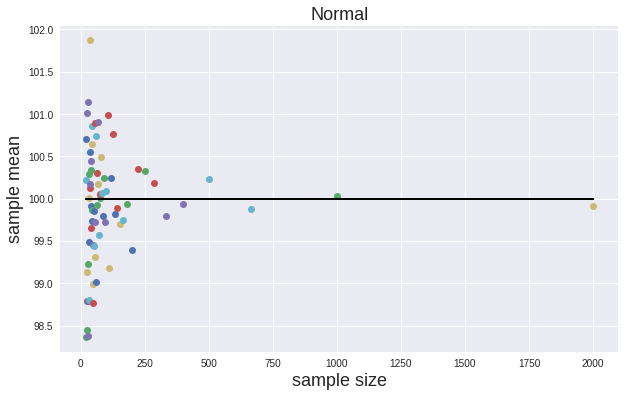

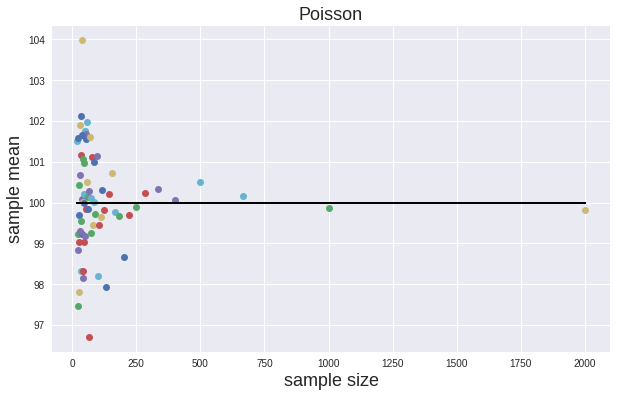

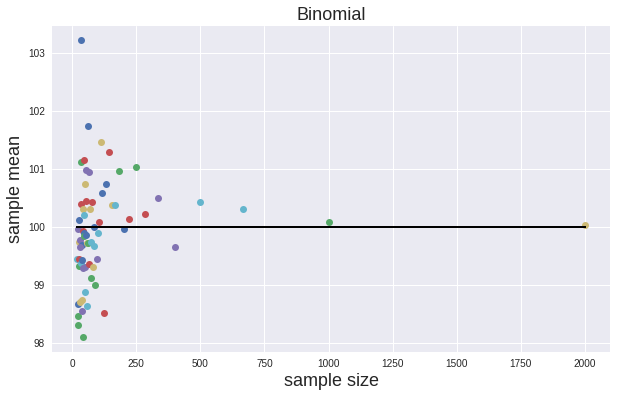

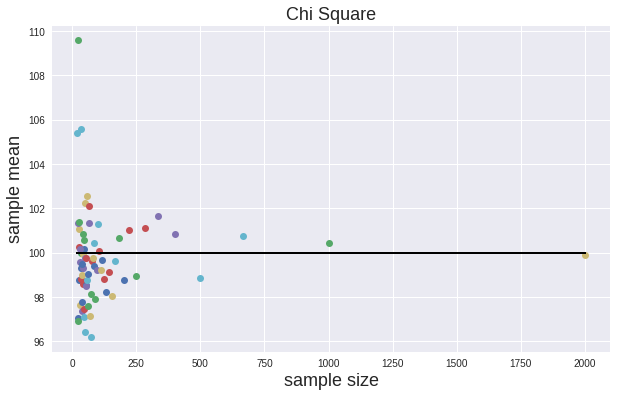

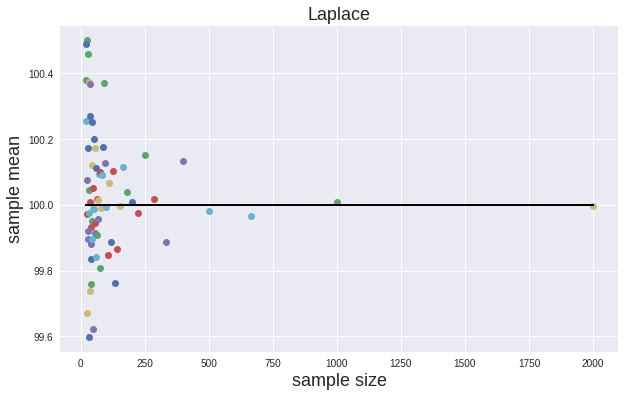

In [18]:
# Plotting for all different Distributions
axnormal_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)
axpoisson_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)
axbinomial_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)
axchisq_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)
axlaplace_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for dist in distributions:
    
    if dist == 'Normal':
        for nn in md[dist]:
            if not type(nn) == str:
                axnormal_mu_n.plot(nn, md[dist]['means'][nn], 'o')
                axnormal_mu_n.set_xlabel('sample size', fontsize=18)
                axnormal_mu_n.set_ylabel('sample mean', fontsize=18)
                axnormal_mu_n.set_title('Normal', fontsize=18)
                axnormal_mu_n.plot([min(mysize), max(mysize)], [df, df], 'k')
    
    if dist == 'Poisson':
        for nn in md[dist]:
            if not type(nn) == str:
                axpoisson_mu_n.plot(nn, md[dist]['means'][nn], 'o')
                axpoisson_mu_n.set_xlabel('sample size', fontsize=18)
                axpoisson_mu_n.set_ylabel('sample mean', fontsize=18)
                axpoisson_mu_n.set_title('Poisson', fontsize=18)
                axpoisson_mu_n.plot([min(mysize), max(mysize)], [df, df], 'k')
    
    if dist == 'Binomial':
        for nn in md[dist]:
            if not type(nn) == str:
                axbinomial_mu_n.plot(nn, md[dist]['means'][nn], 'o')
                axbinomial_mu_n.set_xlabel('sample size', fontsize=18)
                axbinomial_mu_n.set_ylabel('sample mean', fontsize=18)
                axbinomial_mu_n.set_title('Binomial', fontsize=18)
                axbinomial_mu_n.plot([min(mysize), max(mysize)], [df, df], 'k')
    
    if dist == 'ChiSquare':
        for nn in md[dist]:
            if not type(nn) == str:
                axchisq_mu_n.plot(nn, md[dist]['means'][nn], 'o')
                axchisq_mu_n.set_xlabel('sample size', fontsize=18)
                axchisq_mu_n.set_ylabel('sample mean', fontsize=18)
                axchisq_mu_n.set_title('Chi Square', fontsize=18)
                axchisq_mu_n.plot([min(mysize), max(mysize)], [df, df], 'k')
    
    if dist == 'Laplace':
        for nn in md[dist]:
            if not type(nn) == str:
                axlaplace_mu_n.plot(nn, md[dist]['means'][nn], 'o')
                axlaplace_mu_n.set_xlabel('sample size', fontsize=18)
                axlaplace_mu_n.set_ylabel('sample mean', fontsize=18)
                axlaplace_mu_n.set_title('Laplace', fontsize=18)
                axlaplace_mu_n.plot([min(mysize), max(mysize)], [df, df], 'k')

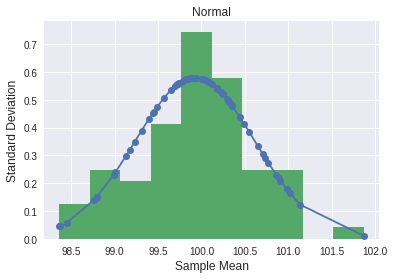

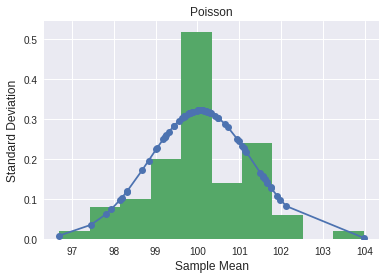

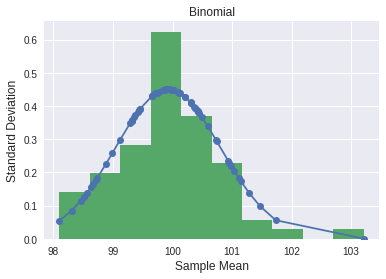

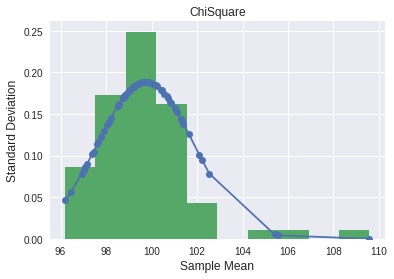

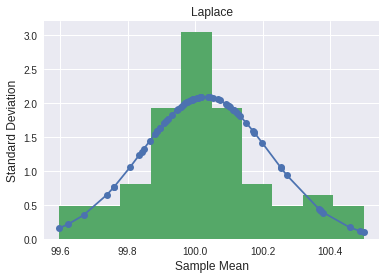

In [31]:
for dist in distributions:    
    h = sort(list(md[dist]['means'].values()))
    fit = stats.norm.pdf(h, np.mean(h), np.std(h))  #this is a fitting indeed
    pl.plot(h,fit,'-o')
    pl.hist(h,normed=True)      #use this to draw histogram of your data
    pl.title(dist)
    pl.xlabel('Sample Mean', fontsize = 12)
    pl.ylabel('Standard Deviation', fontsize = 12)
    pl.show()  

# Central Limit Theorem for Different Distributions:

### It can be observed that for all the distribution types considering 100 distributions of sample size 100 each the weight of the graph is concentrated towards the Mean of the distribution. This justifies that all the distributions that we have plotted follow central limit theorem.\


## Normal Distribution

### "The central limit theorem states that if you have a population with mean μ and standard deviation σ and take sufficiently large random samples from the population with replacement , then the distribution of the sample means will be approximately normally distributed"

### It is very clearly evident that the normal distribution obeys central limit theorem.

## Poisson Distribution

### "Poisson(100) distribution can be thought of as the sum of 100 independent Poisson(1) variables and hence may be considered approximately Normal, by the central limit theorem, so Normal( μ = rate*Size = λ*N, σ =√(λ*N)) approximates Poisson(λ*N = 1*100 = 100)"

### Since Poisson can be approximated to a normal distribution. It obeys Central Limit Theorem.

## Binomial Distribution

### For the binomial distribution b(n, p, j) we have 

### limn→∞ √npq b(n, p,{np + x √npq}) = φ(x)

### So higher the distribution, induvidual probabilities turn close to zero making n tending to ∞ making it obey CLT.

## ChiSquare Distribution

### If there we take standardized normal distribtution as in our case, the distribution tends to follow the standard normal distribution

## Laplace Distribution

### Laplace Distribution clearly follows the Central Distribution Theorem.



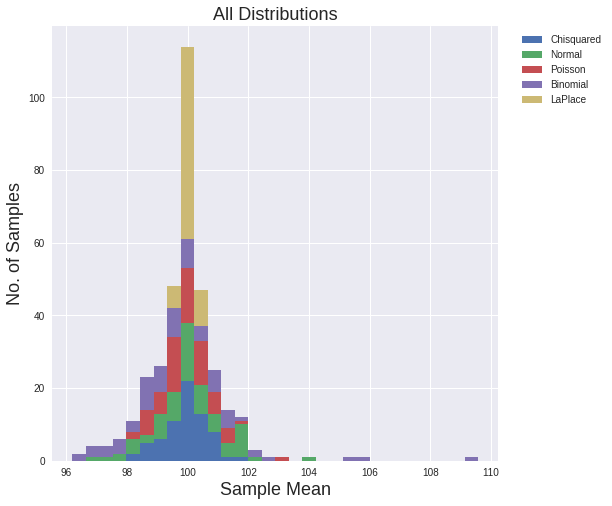

In [35]:
# Plotting all the distributions together as a histogram
Normal = list(md['Normal']['means'].values())
Poisson = list(md['Poisson']['means'].values())
Binomial = list(md['Binomial']['means'].values())
ChiSquare = list(md['ChiSquare']['means'].values())
Laplace = list(md['Laplace']['means'].values())
pl.figure(figsize=(8,8))
pl.hist((Normal, Poisson, Binomial, ChiSquare, Laplace),bins=30,stacked=True)
pl.xlabel('Sample Mean', fontsize = 18)
pl.ylabel('No. of Samples', fontsize = 18)
pl.legend(('Chisquared','Normal','Poisson','Binomial','LaPlace'),loc='upper right',bbox_to_anchor=(1.25,1))
pl.title("All Distributions", fontsize = 18)

## Graph Containing all the distribution means in one